# Heat loss in the vertical section of a well

In this case, we inject fluid at constant temperature and we obtain how much heat is being lost in the vertical section of the well

## Importing libraries

In [1]:
import scipy.special as scsp 
import numpy as np
import pdb
import matplotlib.pyplot as plt


## Input Data

In [2]:
kT=2.37E+05       #J/m.day.C
MT=2.37E+06       #J/m3C
rw=4.5            #inches
re=4.5*100        #inches
End_Time=20       #months
Ts=200            #C
T0=10             #C
Time_Step=86400   #s
r_step=0.1        #m
Len_well=500      #m

# Propane inputs
q_solv = 300      #m3/day
Cp=2.6            #kJ/kg.K
C3_Density=493    #kg/m3

# Butane inputs
q_solv = 300      #m3/day
Cp=2.6            #kJ/kg.K
C3_Density=599    #kg/m3

#Steam Inputs
T_sat=226         #K
P_sat=2.5e+6      #MPa
q_steam=300       #m3/day
Lv=2147.26        #kJ/kg
Wat_Density=1000  #kg/m3

## Unit Conversion

In [3]:
kT=kT/86400;                 #J/m.s.C
rw=rw*2.54/100               #m
re=re*2.54/100               #m
End_Time=End_Time*30*86400   #sec
Ts=Ts+273.15                 #K
T0=T0+273.15                 #K
T_sat=T_sat+273.15           #K

In [4]:
Time = np.arange(Time_Step, End_Time, Time_Step)
r    = np.arange(rw,  re,  r_step)

## Dimensionless

In [5]:
rD=r/rw
alpha=kT/MT
tD=alpha*Time/(rw**2)
len(rD)

114

In [6]:
len(tD)

599

In [7]:
def Lap_Function (s, rDD):
    kth_zero_num = scsp.kv(0, rDD*np.sqrt(s))
    kth_zero_denom = scsp.kv(0, np.sqrt(s))
    TD_Lap = kth_zero_num/(s*kth_zero_denom)
    return TD_Lap


In [8]:
def Stehfest_Function (tDD, rDD):
    num=14;
    summ=0;
    for n in range(num):
        Lower_Bound = int(np.floor((n+2)/2))
        Upper_Bound = int(np.minimum(n+1,num/2))
              
        summ2=0
        for j in range(Lower_Bound,Upper_Bound+1):
            summ2 = summ2+j**(num/2)*scsp.factorial(2*j)/(scsp.factorial(num/2-j)*scsp.factorial(j)*scsp.factorial(n+1-j)*scsp.factorial(j-1)*scsp.factorial(2*j-n-1))
                        
            
        V=(-1)**(num/2+(n+1))*summ2
        input_func = np.log(2)*(n+1)/tDD
        
        value_func = Lap_Function(input_func,rDD)
        
        summ = summ + V*value_func
        
    return np.log(2)*summ/tDD


In [9]:
rows = int(len(tD))
cols = int(len(rD))

TD = []
for i in range(rows):
  row = []
  for j in range(cols):
    row.append(0)
  TD.append(row)
np.shape(TD)

#TD = np.empty((rows, cols), int)
#TD

(599, 114)

In [10]:
np.shape(TD)

(599, 114)

In [11]:
for mm in range(tD.shape[0]):
    for nn in range(rD.shape[0]):
        TD[mm][nn]=float(Stehfest_Function (tD[mm],rD[nn]))

In [12]:
TD_Array=np.array(TD)
type(TD_Array)

numpy.ndarray

In [13]:
Temperature=(T_sat-T0)*TD_Array+T0-273.15
Temperature

array([[226.00000025, 149.27283755, 103.93804814, ...,  10.        ,
         10.        ,  10.        ],
       [225.99999849, 159.98604009, 120.32121455, ...,  10.        ,
         10.        ,  10.        ],
       [225.9999986 , 165.15474188, 128.40623123, ...,  10.        ,
         10.        ,  10.        ],
       ...,
       [225.99999985, 197.24342999, 179.72267453, ...,  24.01798245,
         23.7538222 ,  23.4941784 ],
       [225.99999943, 197.2483984 , 179.73066863, ...,  24.04014944,
         23.77583196,  23.51602976],
       [225.99999981, 197.25335502, 179.73864661, ...,  24.06229041,
         23.79781619,  23.53785608]])

In [14]:
type(Temperature)

numpy.ndarray

## Heat loss to the surrounding 

In [15]:
rows = int(len(tD))
Q = []
for i in range(rows):
  Q.append(0)

np.shape(Q)

(599,)

In [16]:
for mm in range(tD.shape[0]):
    Q[mm] = -kT*(2*np.pi*rw*Len_well)*Time_Step*(Temperature[mm][1]-Temperature[mm][0])/(r_step*1.0E9)     #GJ

In [17]:
Time_day = np.arange(Time_Step, End_Time, Time_Step)/86400

In [18]:
np.shape(Q)

(599,)

In [19]:
np.shape(Time_day)

(599,)

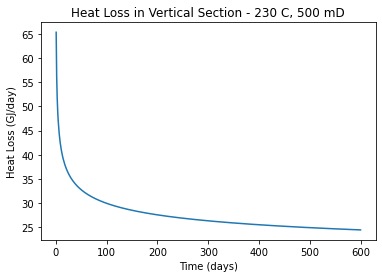

In [20]:
plt.plot(Time_day,Q)
plt.title('Heat Loss in Vertical Section - 230 C, 500 mD')
plt.ylabel('Heat Loss (GJ/day)')
plt.xlabel('Time (days)')
plt.show()

In [21]:
rows = int(len(tD))
Steam_quality = []
for i in range(rows):
  Steam_quality.append(0)

for mm in range(tD.shape[0]):
    Steam_quality [mm] = 1-((Q[mm]*1.0E+6/Time_Step)/(Wat_Density*q_steam*Lv/86400))

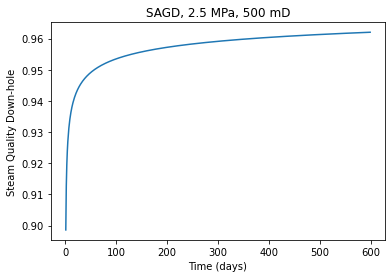

In [22]:
plt.plot(Time_day,Steam_quality)
plt.title('SAGD, 2.5 MPa, 500 mD')
plt.ylabel('Steam Quality Down-hole')
plt.xlabel('Time (days)')
plt.show()

In [23]:
Temperature_Solv=(Ts-T0)*TD_Array+T0-273.15

rows = int(len(tD))
Q_solv = []
for i in range(rows):
  Q_solv.append(0)

np.shape(Q_solv)

for mm in range(tD.shape[0]):
    Q_solv[mm] = -kT*(2*np.pi*rw*Len_well)*Time_Step*(Temperature_Solv[mm][1]-Temperature_Solv[mm][0])/(r_step*1.0E9)     #GJ

rows = int(len(tD))
Delta_Temp = []
for i in range(rows):
  Delta_Temp.append(0)

for mm in range(tD.shape[0]):
    Delta_Temp [mm] = (Q_solv[mm]*1.0E+6/Time_Step)/(C3_Density*q_solv*Cp/86400)


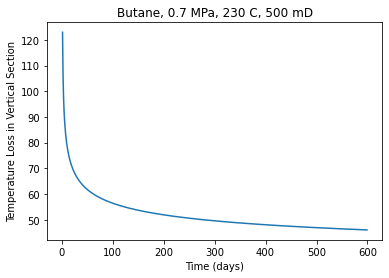

In [25]:
plt.plot(Time_day,Delta_Temp)
plt.title('Butane, 0.7 MPa, 230 C, 500 mD')
plt.ylabel('Temperature Loss in Vertical Section')
plt.xlabel('Time (days)')
plt.show()